# Derivación numérica: diferencias finitas

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [1]:
"""
`derivada_derecha(f,x_0,h)` devuelve el valor aproximado de `f'(x_0)` empleando el 
método de aproximación lateral (aproximando el límite)
"""
function derivada_derecha(f, h::Float64, x_0 = 0.0)
    (f(x_0 + h) - f(x_0)) / h
end

derivada_derecha (generic function with 2 methods)

In [2]:
f(x) = 3x^3 - 2

f (generic function with 1 method)

In [3]:
derivada_derecha(f,1e-15,1)

9.769962616701378

In [17]:
? logspace

search: 

```
logspace(start, stop, n=50)
```

Construct a vector of `n` logarithmically spaced numbers from `10^start` to `10^stop`.


logspace



In [64]:
intervalo_h = logspace(-15,-1, 1000);

In [5]:
using PyPlot

In [66]:
err_deriv = Float64[abs(derivada_derecha(f,x,1)-9) for x in intervalo_h];

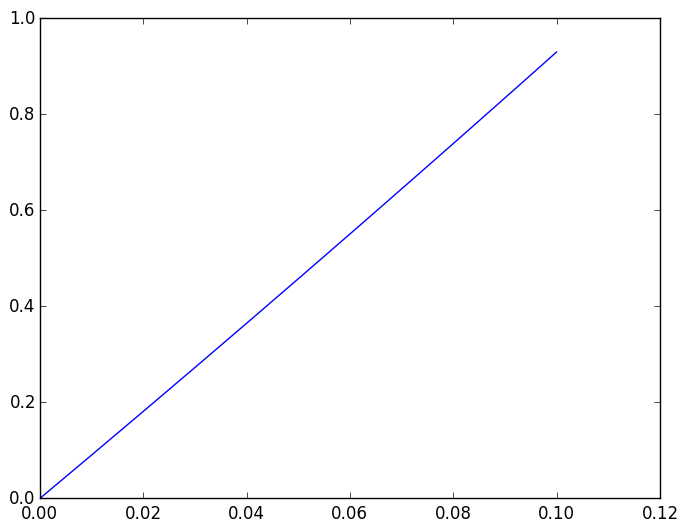

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3249259908>

In [67]:
plot(intervalo_h, err_deriv)

**Respuesta:** El error absoluto tiene un comportamiento logarítmico. Tiende a cero.

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [22]:
function derivada_central(f, h::Float64, x_0 = 0.0)
    (f(x_0 + h) - f(x_0 - h)) / (2h)
end

derivada_central (generic function with 2 methods)

In [23]:
derivada_central(f,1e-15,1)

9.325873406851315

In [68]:
err_deriv2 = Float64[abs(derivada_central(f,x,1)-9) for x in intervalo_h];

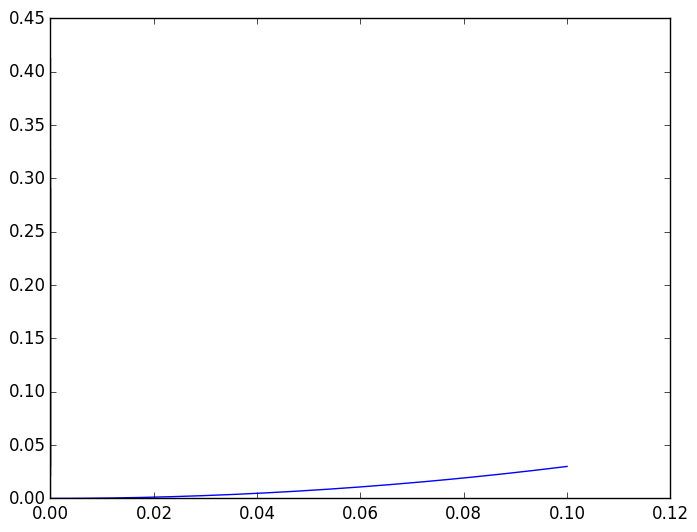

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f32491b2400>

In [69]:
plot(intervalo_h, err_deriv2, label = "Derivada central")

In [63]:
linreg(log(intervalo_h), err_deriv2)

2-element Array{Float64,1}:
 10.9999   
 -5.9207e-6

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [39]:
function derivada_compleja(f, h::Float64, x_0 = 0.0)
    imag(f(x_0 + im*h)/h)
end

derivada_compleja (generic function with 2 methods)

In [40]:
derivada_compleja(f,1e-15,1)

9.0

In [70]:
err_deriv3 = Float64[abs(derivada_compleja(f,x,1)-9) for x in intervalo_h];

In [62]:
? linreg

search: 

```
linreg(x, y, w)
```

Weighted least-squares linear regression.

```
linreg(x, y) -> a, b
```

Perform linear regression. Returns `a` and `b` such that `a + b*x` is the closest straight line to the given points `(x, y)`, i.e., such that the squared error between `y` and `a + b*x` is minimized.

**Example**:

```
using PyPlot
x = [1.0:12.0;]
y = [5.5, 6.3, 7.6, 8.8, 10.9, 11.79, 13.48, 15.02, 17.77, 20.81, 22.0, 22.99]
a, b = linreg(x, y)          # Linear regression
plot(x, y, "o")              # Plot (x, y) points
plot(x, [a+b*i for i in x])  # Plot line determined by linear regression
```


linreg linrange LineNumberNode



In [61]:
linreg(log(intervalo_h), err_deriv3)

2-element Array{Float64,1}:
 10.9999   
 -5.9207e-6

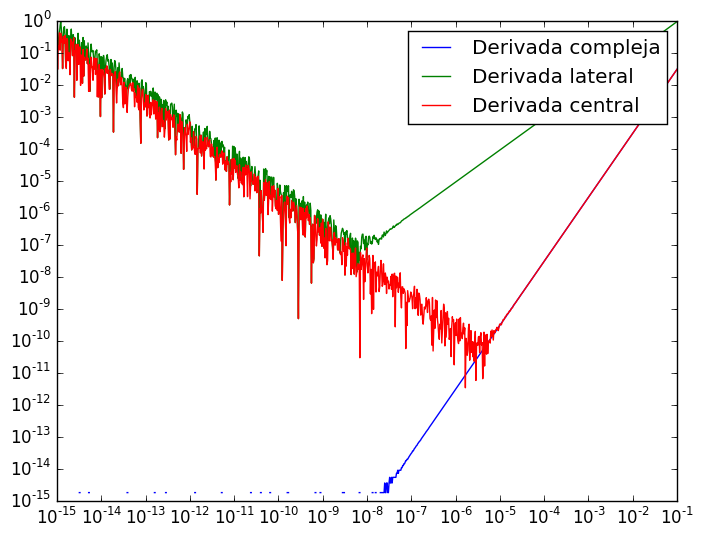

PyObject <matplotlib.legend.Legend object at 0x7f3249071ef0>

In [76]:
loglog(intervalo_h, err_deriv3, label ="Derivada compleja")
loglog(intervalo_h, err_deriv, label ="Derivada lateral")
loglog(intervalo_h, err_deriv2, label = "Derivada central")
legend()

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

**Respuesta: ** 

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?